<a href="https://colab.research.google.com/github/ThomasAlbin/Astroniz-YT-Tutorials-HIDDEN/blob/main/CompressedCosmos_SaturnsRing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.0 MB/s eta 0:00:00


Current tilt of Saturn's rings: 1.9972817656320179 degrees


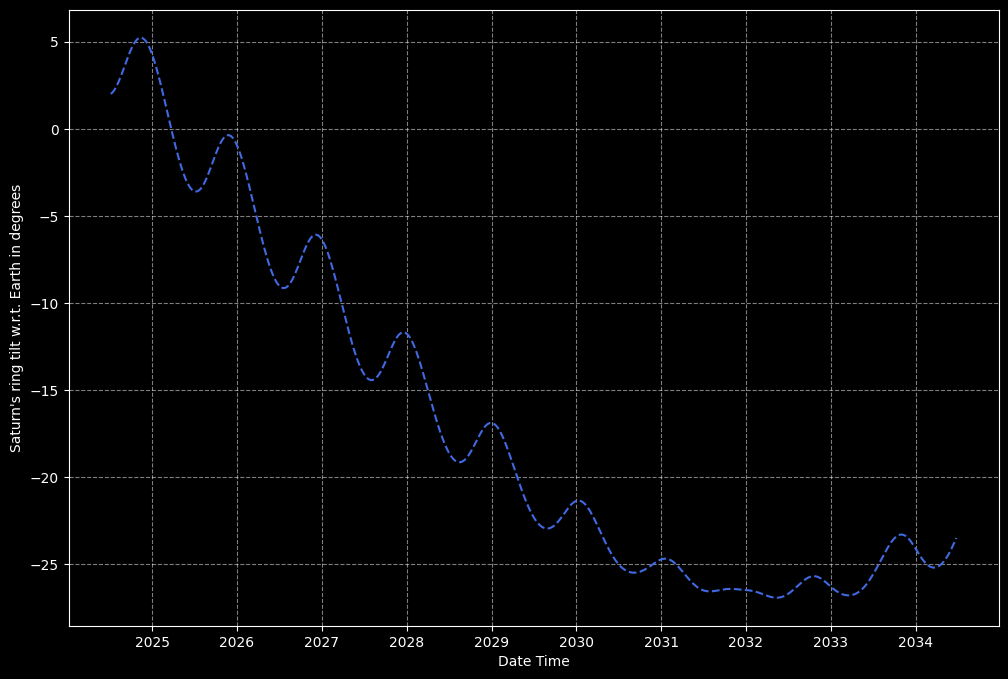

In [12]:
import ephem
from matplotlib import pyplot as plt
import numpy as np

from datetime import datetime, timedelta

def saturn_ring_tilt(datetime_obj=None):
    """Calculates the tilt angle of Saturn's rings as seen from Earth at a datetime."""

    observer = ephem.Observer()
    if not datetime_obj:
        observer.date = datetime.utcnow()  # Use current UTC time
    else:
        observer.date = datetime_obj

    saturn = ephem.Saturn(observer)

    # Get Saturn's sub-observer point latitude (ring plane inclination)
    ring_plane_inclination = saturn.earth_tilt

    # Convert to degrees
    tilt_angle = np.degrees(ring_plane_inclination)

    return tilt_angle

def saturn_ring_tilt_evolve(start_time, end_time):
    """Evolves the tilt angle of Saturn's rings over time."""
    tilt_angles = []
    tilt_datetimes = []
    time = start_time
    while time <= end_time:
        tilt_angle = saturn_ring_tilt(time)
        tilt_angles.append(tilt_angle)
        tilt_datetimes.append(time)
        time += timedelta(weeks=1)
    return tilt_angles, tilt_datetimes

if __name__ == "__main__":
    tilt = saturn_ring_tilt()
    print("Current tilt of Saturn's rings:", tilt, "degrees")

    ring_tilt_angles, ring_tilt_datetimes = \
        saturn_ring_tilt_evolve(start_time=datetime.utcnow(),
                                end_time = datetime.utcnow() + timedelta(weeks=520))

    plt.style.use('dark_background')

    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(ring_tilt_datetimes,
            ring_tilt_angles,
            linestyle='--',
            color='royalblue')

    ax.grid(True, linestyle='dashed', alpha=0.5)

    ax.set_xlabel("Date Time")
    ax.set_ylabel("Saturn's ring tilt w.r.t. Earth in degrees")

    plt.show()